# Homework 4

### Problem 0: some fake data to mess with

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats, signal 

 time axis that goes from 0 to 100 π  in 1e5 steps

In [3]:
t = np.linspace(0,np.pi*100,np.int(1e5))

Offset sinusoid

In [5]:
N = 10+np.sin(t)

some random background data whose mean and variance depend on N

In [6]:
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

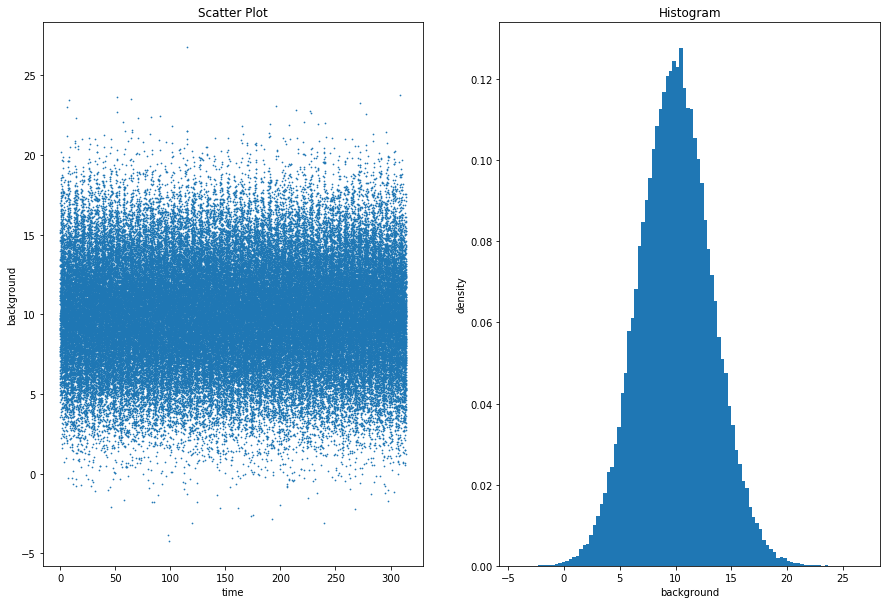

In [8]:
plt.rcParams["figure.figsize"] = (15,10)
fig,ax = plt.subplots(1,2)
ax[0].scatter(t,bkgd,s=.5)
ax[0].set_title("Scatter Plot")
ax[0].set_xlabel("time")
ax[0].set_ylabel("background")
ax[1].hist(bkgd,100,density=True)
ax[1].set_title("Histogram")
ax[1].set_xlabel("background")
ax[1].set_ylabel("density")
plt.show()

## Problem 1

1a) Make a scatter plot (not a line plot) of the first 1000 data points.

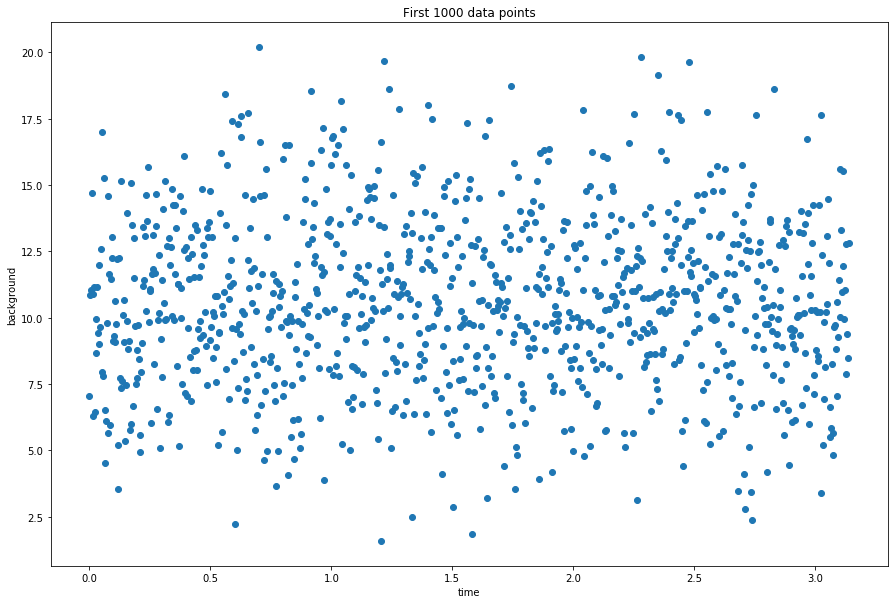

In [29]:
x = t[:1000]
points = bkgd[:1000]
plt.scatter(x,points)
plt.title('First 1000 data points')
plt.ylabel('background');
plt.xlabel('time');

1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

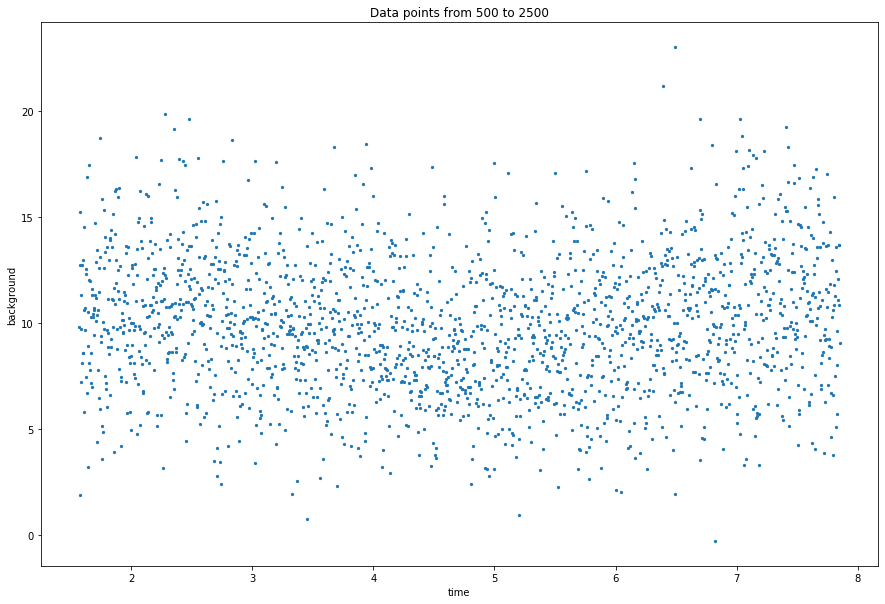

In [36]:
# t = given time axis, bkgd = created random background dependent on N, start = where we want to start slicing from, amount = how far we want to slice to. ex: 2000 points starting from 
# 500 will give us an x array from 500 to 2500.
def slice_plot(t, bkgd, start, amount, step):
    x = t[start:(start + amount): step]
    bkgd1 = bkgd[start: (start + amount): step]
    plt.scatter(x, bkgd1, s=5)
    if amount != -1:
        plt.title('Data points from ' + str(start) + ' to ' + str(start + amount))
    else:
        plt.title('Full Datastep with Step = ' + str(step))
    plt.xlabel('time')
    plt.ylabel('background')
slice_plot(t, bkgd, 500, 2000, 1)

1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

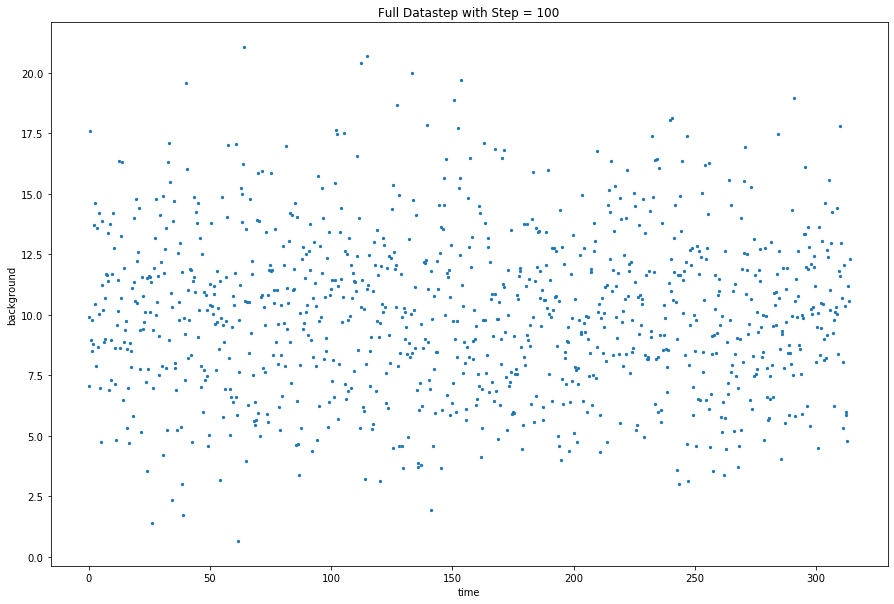

In [37]:
slice_plot(t, bkgd,0, -1, 100)

### Problem 2: Density

2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

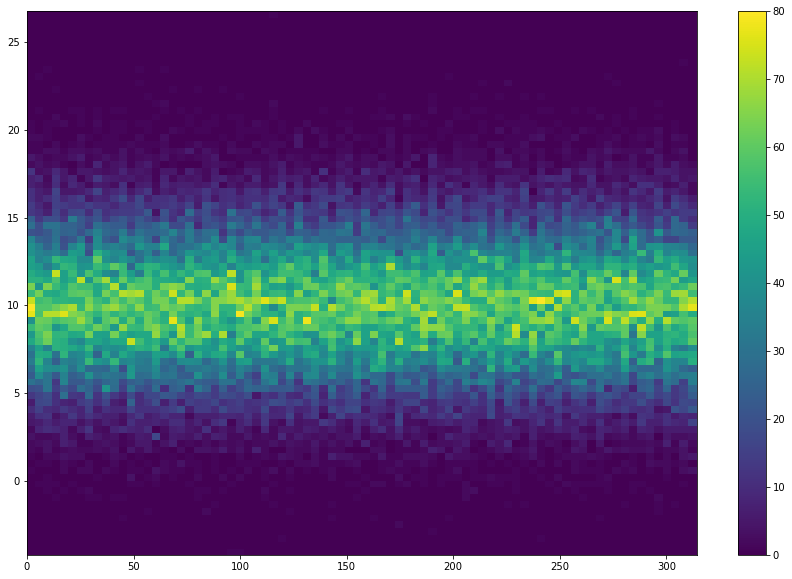

In [42]:
plt.hist2d(t, bkgd, bins=80);
plt.colorbar();

### Problem 3: Folding

In [45]:
t_mod = np.mod(t,(np.pi*2))

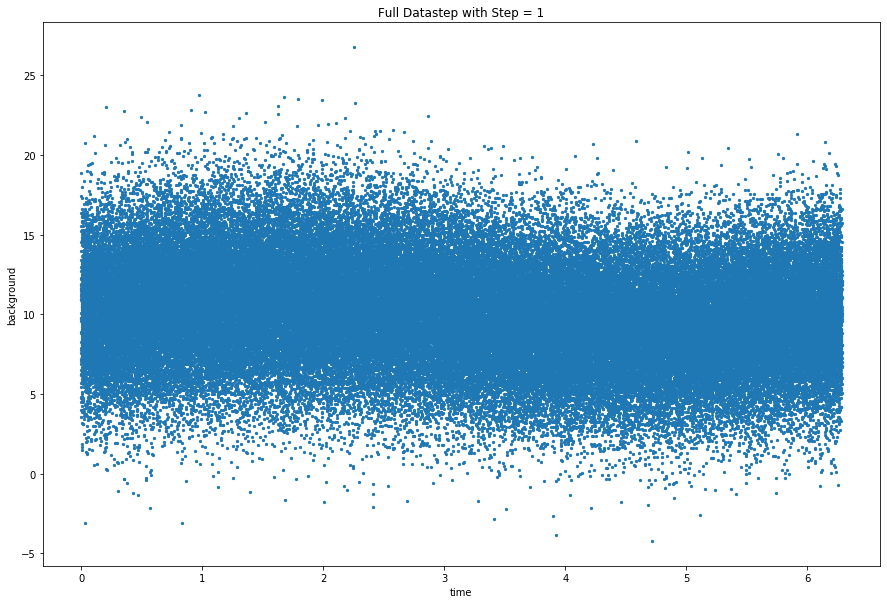

In [53]:
slice_plot(t_mod,bkgd, 0, -1, 1)

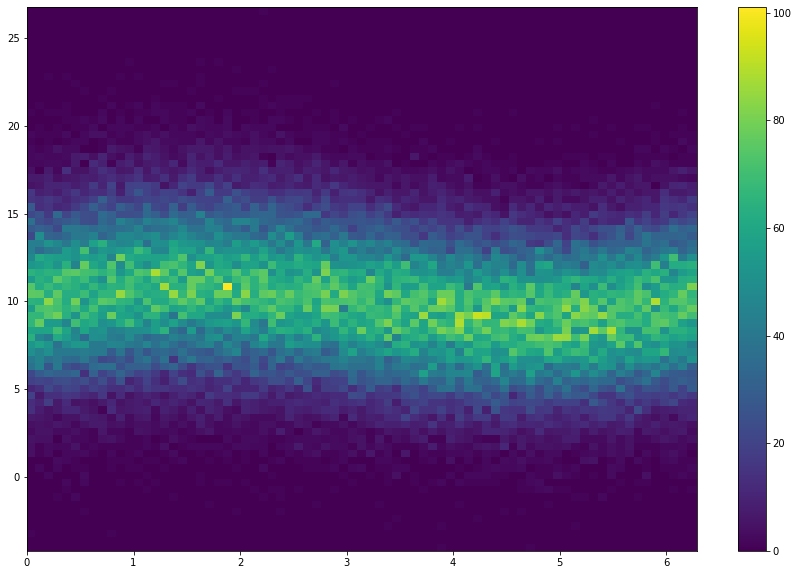

In [54]:
plt.hist2d(t_mod,bkgd,bins=75)
plt.colorbar()